In [7]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time
import torchvision.datasets.mnist as ds
%matplotlib inline


In [8]:
transformation = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))])

In [9]:
train_dataset = ds.MNIST('data/', train=True, transform=transformation, download=True)

In [10]:
test_dataset = ds.MNIST('data/', train=False, transform=transformation, download=True)

In [11]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [12]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [13]:
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image, cmap='gray')

In [14]:
sample_data = next(iter(train_loader))

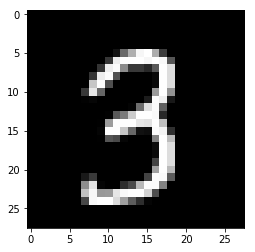

In [15]:
plot_img(sample_data[0][1])
plot_img(sample_data[0][2])

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [38]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):

        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).data[0]
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    
    print('{} loss is loss:{} and accuracy is {}'.format(phase, loss, accuracy))
    return loss,accuracy

In [39]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []
for epoch in range(1,20):
    epoch_loss, epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, test_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is loss:0.6685415506362915 and accuracy is 78
validation loss is loss:0.1235802099108696 and accuracy is 96
training loss is loss:0.30116724967956543 and accuracy is 90
validation loss is loss:0.0888022854924202 and accuracy is 97
training loss is loss:0.24430017173290253 and accuracy is 92
validation loss is loss:0.07289131730794907 and accuracy is 97
training loss is loss:0.2127895951271057 and accuracy is 93
validation loss is loss:0.06407587230205536 and accuracy is 97
training loss is loss:0.1890692263841629 and accuracy is 94
validation loss is loss:0.05433736741542816 and accuracy is 98
training loss is loss:0.17905615270137787 and accuracy is 94
validation loss is loss:0.052040569484233856 and accuracy is 98
training loss is loss:0.17191532254219055 and accuracy is 94
validation loss is loss:0.04912309721112251 and accuracy is 98
training loss is loss:0.1589764803647995 and accuracy is 95
validation loss is loss:0.043956007808446884 and accuracy is 98
training los

/home/hannahzhang/cs231n/spring1718_assignment2_v2/.env/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/hannahzhang/cs231n/spring1718_assignment2_v2/.env/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


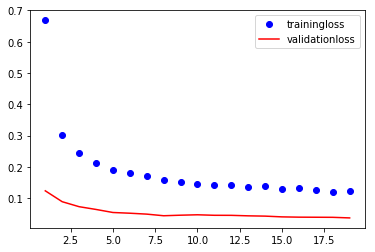

In [40]:
plt.plot(range(1, len(train_losses) + 1), train_losses, 'bo', label = 'trainingloss')
plt.plot(range(1, len(val_losses) + 1), val_losses, 'r', label = 'validationloss')
plt.legend()